In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tools for creating ngrams and vectorizing input data
from gensim.models import Word2Vec, Phrases

# Tools for building a model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

# Tools for assessing the quality of model prediction
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (16, 8),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}
plt.rcParams.update(params)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Sentiment analysis/data/IMDB Dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [8]:
data['sentiment'] = data['sentiment'].apply(lambda x:1 if x=='negative' else 0)

In [9]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          0
1  A wonderful little production. <br /><br />The...          0
2  I thought this was a wonderful way to spend ti...          0
3  Basically there's a family where a little boy ...          1
4  Petter Mattei's "Love in the Time of Money" is...          0

In [10]:
data.shape

(50000, 2)

In [11]:
train_data = data[0:40000]
test_data = data[40000:]

In [12]:
y_actual_pred = test_data['sentiment']
y_actual_pred.shape

(10000,)

In [13]:
test_data = test_data.drop(columns='sentiment')
test_data.head()

review
40000  First off I want to say that I lean liberal on...
40001  I was excited to see a sitcom that would hopef...
40002  When you look at the cover and read stuff abou...
40003  Like many others, I counted on the appearance ...
40004  This movie was on t.v the other day, and I did...

In [14]:
train_data.shape


(40000, 2)

In [15]:
test_data.shape

(10000, 1)

In [16]:
datasets = [train_data]
titles = ['Train data']
for dataset, title in zip(datasets,titles):
    # print(title)
    # dataset.info()
    display(dataset.head())

review  sentiment
0  One of the other reviewers has mentioned that ...          0
1  A wonderful little production. <br /><br />The...          0
2  I thought this was a wonderful way to spend ti...          0
3  Basically there's a family where a little boy ...          1
4  Petter Mattei's "Love in the Time of Money" is...          0

In [17]:
dataset.shape

(40000, 2)

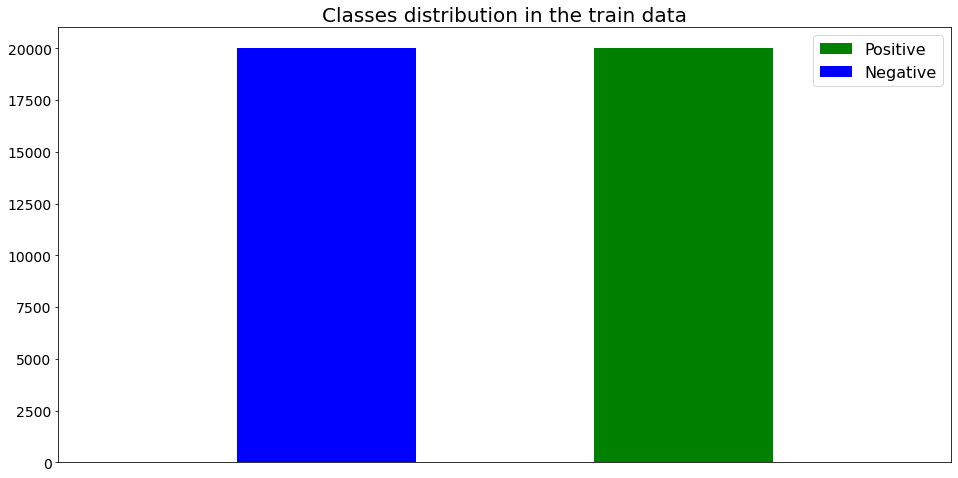

In [18]:
plt.hist(train_data[train_data.sentiment == 1].sentiment,
         bins=2, color='green', label='Positive')
plt.hist(train_data[train_data.sentiment == 0].sentiment,
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data', fontsize=LARGE_SIZE)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [19]:
def clean_review(raw_review: str) -> str:
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text()
    # 2. Remove non-letters
    letters_only = REPLACE_WITH_SPACE.sub(" ", review_text)
    # 3. Convert to lower case
    lowercase_letters = letters_only.lower()
    return lowercase_letters


def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    return meaningful_words


def preprocess(review: str) -> list:
   
    # if show_progress:
    #     global counter
    #     counter += 1
    #     print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Clean text
    review = clean_review(review)
    # 2. Split into individual words
    tokens = word_tokenize(review)
    # 3. Lemmatize
    lemmas = lemmatize(tokens)
    # 4. Join the words back into one string separated by space,
    # and return the result.
    return lemmas

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
counter = 0
REPLACE_WITH_SPACE = re.compile(r'[^A-Za-z\s]')
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [22]:
all_reviews = []
for i in range(len(train_data)):
  all_reviews.append(train_data.iloc[i]['review'])

In [23]:
len(all_reviews)

40000

In [24]:
x=[]
for i in range(len(all_reviews)):
  try:
    x.append(preprocess(all_reviews[i]))
  except:
    print('error in ',i)
    continue

In [25]:
all_reviews = x

In [26]:
counter = 0

In [27]:
train_data.shape[0]

40000

In [28]:
X_train_data = all_reviews[:train_data.shape[0]]


In [29]:
print(X_train_data[0:2])

[['one', 'reviewer', 'ha', 'mention', 'watch', 'oz', 'episode', 'hook', 'right', 'exactly', 'happen', 'first', 'thing', 'strike', 'oz', 'wa', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'deal', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess',

In [30]:
Y_train_data = train_data.sentiment.values

In [31]:
train_data['review_lenght'] = np.array(list(map(len, X_train_data)))
median = train_data['review_lenght'].median()
mean = train_data['review_lenght'].mean()
mode = train_data['review_lenght'].mode()[0]

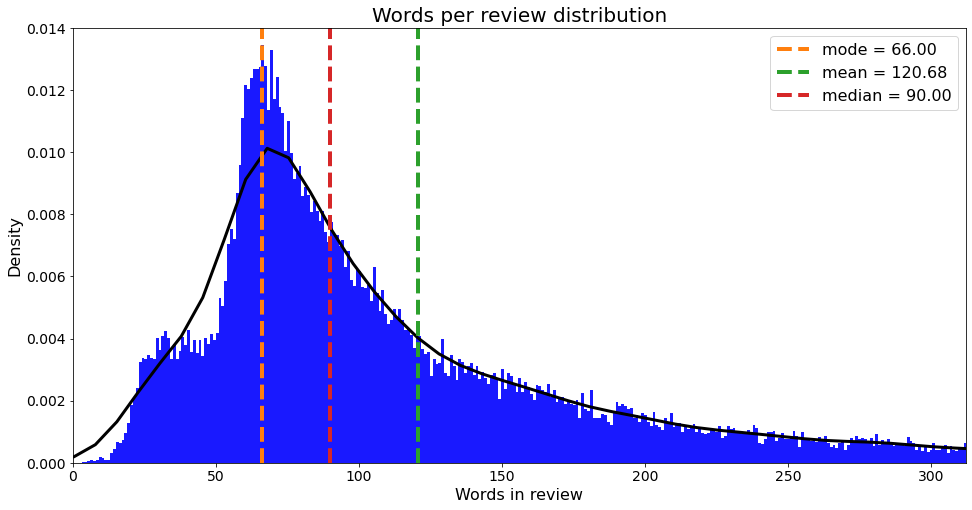

In [32]:
fig, ax = plt.subplots()
sb.distplot(train_data['review_lenght'], bins=train_data['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(train_data['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode, mode], [0, ymax], '--', label=f'mode = {mode:.2f}', linewidth=4)
ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=4)
ax.plot([median, median], [0, ymax], '--',
        label=f'median = {median:.2f}', linewidth=4)
ax.set_title('Words per review distribution', fontsize=20)
plt.legend()
plt.show()

In [33]:
%%time
bigrams = Phrases(sentences=all_reviews)

CPU times: user 10.2 s, sys: 214 ms, total: 10.4 s
Wall time: 10.5 s


In [34]:
%%time
trigrams = Phrases(sentences=bigrams[all_reviews])

CPU times: user 31 s, sys: 242 ms, total: 31.3 s
Wall time: 31.4 s


In [35]:
%%time
embedding_vector_size = 256
trigrams_model = Word2Vec(
    sentences = trigrams[bigrams[all_reviews]],
    size = embedding_vector_size,
    min_count=3, window=5, workers=4)

CPU times: user 6min 32s, sys: 1.38 s, total: 6min 34s
Wall time: 5min 20s


In [36]:
print("Vocabulary size:", len(trigrams_model.wv.vocab))

Vocabulary size: 52762


In [37]:
trigrams_model.wv.most_similar('galaxy')

[('space_shuttle', 0.943516731262207),
 ('deposit', 0.9353481531143188),
 ('laboratory', 0.9269174933433533),
 ('space_station', 0.9254798293113708),
 ('carrier', 0.9236605167388916),
 ('federal', 0.9230140447616577),
 ('detonate', 0.9220582246780396),
 ('shantytown', 0.919620931148529),
 ('continent', 0.9196074604988098),
 ('isolate_island', 0.9182952642440796)]

In [38]:
trigrams_model.wv.doesnt_match(['galaxy', 'starship', 'planet', 'dog'])

'dog'

In [39]:
%%time
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

print('Convert sentences to sentences with ngrams...', end='\r')
X_data = trigrams[bigrams[X_train_data]]
print('Convert sentences to sentences with ngrams... (done)')
input_length = 150
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=trigrams_model.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Convert sentences to sentences with ngrams... (done)
Vectorize sentences... (done)
Transform sentences to sequences... (done)
CPU times: user 7min 52s, sys: 1.43 s, total: 7min 53s
Wall time: 7min 53s


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    Y_train_data,
    test_size=0.3,
    shuffle=True,
    random_state=42)

In [41]:
from keras.layers import Dense,GRU,LSTM,Embedding
def build_model(embedding_matrix: np.ndarray, input_length: int):
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = input_length,
        weights = [embedding_matrix],
        trainable=False))
    model.add(GRU(64,dropout=0.4,return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

model = build_model(
    embedding_matrix=trigrams_model.wv.vectors,
    input_length=input_length)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 256)          13507072  
_________________________________________________________________
gru (GRU)                    (None, 150, 64)           61824     
_________________________________________________________________
dense (Dense)                (None, 150, 1)            65        
Total params: 13,568,961
Trainable params: 61,889
Non-trainable params: 13,507,072
_________________________________________________________________


In [43]:
model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=20)

Epoch 1/20
280/280 [==============================] - 72s 250ms/step - loss: 0.5164 - accuracy: 0.7347 - val_loss: 0.4892 - val_accuracy: 0.7526
Epoch 2/20
280/280 [==============================] - 70s 248ms/step - loss: 0.5059 - accuracy: 0.7406 - val_loss: 0.4803 - val_accuracy: 0.7576
Epoch 3/20
280/280 [==============================] - 70s 249ms/step - loss: 0.4962 - accuracy: 0.7467 - val_loss: 0.4830 - val_accuracy: 0.7568
Epoch 4/20
280/280 [==============================] - 70s 249ms/step - loss: 0.4920 - accuracy: 0.7509 - val_loss: 0.4819 - val_accuracy: 0.7556
Epoch 5/20
280/280 [==============================] - 70s 249ms/step - loss: 0.4841 - accuracy: 0.7550 - val_loss: 0.4816 - val_accuracy: 0.7596
Epoch 6/20
280/280 [==============================] - 68s 244ms/step - loss: 0.4832 - accuracy: 0.7576 - val_loss: 0.4974 - val_accuracy: 0.7460
Epoch 7/20
280/280 [==============================] - 69s 245ms/step - loss: 0.4762 - accuracy: 0.7604 - val_loss: 0.4707 - val_ac

In [44]:
model.save("/content/drive/MyDrive/IMDB Sentiment analysis/data/model_imdb_gru.h5")

In [45]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/IMDB Sentiment analysis/data/model_imdb_gru.h5")

In [46]:
%%time
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

CPU times: user 51.7 s, sys: 1.81 s, total: 53.5 s
Wall time: 31.7 s


In [47]:
y_test_pred = list(map(lambda x: 0 if x[0]<0.3 else 1, y_test_pred))

In [48]:
confusion_matrix(y_test,y_test_pred)

array([[ 276, 5733],
       [  89, 5902]])

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [50]:
accuracy = accuracy_score(y_test,y_test_pred)
accuracy

0.5148333333333334

In [51]:
precision = precision_score(y_test,y_test_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_test_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_test_pred)
print('F1 score: %f' % f1)

Precision: 0.507263
Recall: 0.985144
F1 score: 0.669692


In [52]:
test_data.head()

review
40000  First off I want to say that I lean liberal on...
40001  I was excited to see a sitcom that would hopef...
40002  When you look at the cover and read stuff abou...
40003  Like many others, I counted on the appearance ...
40004  This movie was on t.v the other day, and I did...

In [53]:
len(test_data)

10000

In [54]:
temp = []
for i in range(len(test_data)):
  temp.append(test_data.iloc[i]['review'])

In [55]:
X_submission = temp

In [56]:
temp_arr=[]
for i in range(len(X_submission)):
  try:
    temp_arr.append(preprocess(X_submission[i]))
  except:
    print('error in ',i)
    continue

In [57]:
X_submission = temp_arr

In [58]:
print('Convert sentences to sentences with ngrams...', end='\r')
X_submit = trigrams[bigrams[X_submission]]
print('Convert sentences to sentences with ngrams... (done)')
X_sub = pad_sequences(
    sequences=vectorize_data(X_submit, vocab=trigrams_model.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Convert sentences to sentences with ngrams... (done)
Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [59]:
%%time
Y_sub_pred = model.predict(X_sub)

CPU times: user 13.3 s, sys: 464 ms, total: 13.8 s
Wall time: 10.6 s


In [64]:
len(Y_sub_pred)

10000

In [ ]:
Y_sub_pred

In [69]:
Y_sub_pred = list(map(lambda x: 0 if x<0.3 else 1, Y_sub_pred))
# Y_sub_pred

In [70]:
print(y_actual_pred[0:5])
print(Y_sub_pred[0:5])

40000    1
40001    1
40002    1
40003    1
40004    1
Name: sentiment, dtype: int64
[1, 1, 1, 1, 1]


In [71]:
accuracy = accuracy_score(y_actual_pred,Y_sub_pred)
accuracy

0.5176

In [72]:
precision = precision_score(y_actual_pred,Y_sub_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_actual_pred,Y_sub_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_actual_pred,Y_sub_pred)
print('F1 score: %f' % f1)

Precision: 0.508718
Recall: 0.987583
F1 score: 0.671524
